In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
from sklearn.preprocessing import normalize
from pathlib import Path
import seaborn as sns

In [2]:
# Funcion para correr .cpp

TP = "../src/main"
TEST_DIR = "../tests/"

def run_test(test_name: str, niter: int, eps: float): 
    !{TP} {TEST_DIR + test_name} {niter} {eps}
def run_test_pca(test_name: str, niter: int, eps: float, cant: int): 
    !{TP} {TEST_DIR + test_name} {niter} {eps} {cant}

def read_result_autovalores(test_result: str):
    return pandas.read_csv(TEST_DIR + test_result + '_autovalores.out', names=["autovalores"])

def read_result_autovectores(test_result: str):
    return pandas.read_csv(TEST_DIR + test_result + '_autovectores.out' , names=["autovectores"])

### 1. Tests metodo de la potencia

In [3]:
# # CASO SIMETRICO
# A = np.array([
#   [ 7,  2,  -3],
#   [ 2,  2,  -2],
#   [-3, -2,  -2]
# ])

# # GUARDO TXT
# np.savetxt("../tests/simetrico.txt", A, delimiter=' ')

# # CORRO METODO
# run_test("simetrico.txt", 100000, 1e-21)

# # CARGO AUTOVALORES Y AUTOVECTORES
# l = np.loadtxt("../tests/simetrico.txt_autovalores.out", dtype='f', delimiter=' ')
# v = np.loadtxt("../tests/simetrico.txt_autovectores.out", dtype='f', delimiter=' ', usecols=range(3))

# print(l)
# print(v)


# print(A @ v[:, 0])
# print(l[0] * v[:,0])

# for i in range(len(A)):
#     print(i)
#     print(np.allclose(A @ v[:, i], l[i] * v[:,i], 1e-6))


In [4]:
# # CASO (A) * (A traspuesta)
# AT = A @ A.T
# TA = A.T @ A

# # GUARDO TXT
# np.savetxt("../tests/AT.txt", AT, delimiter=' ')
# np.savetxt("../tests/TA.txt", TA, delimiter=' ')

# # CORRO METODO
# run_test("AT.txt", 100000, 1e-21)
# run_test("TA.txt", 100000, 1e-21)

# # CARGO AUTOVALORES Y AUTOVECTORES
# l_AT = np.loadtxt("../tests/AT.txt_autovalores.out", dtype='f', delimiter=' ')
# v_AT = np.loadtxt("../tests/AT.txt_autovectores.out", dtype='f', delimiter=' ', usecols=range(3))

# l_TA = np.loadtxt("../tests/TA.txt_autovalores.out", dtype='f', delimiter=' ')
# v_TA = np.loadtxt("../tests/TA.txt_autovectores.out", dtype='f', delimiter=' ', usecols=range(3))

# print(l_AT)
# print(l_TA)
# print("Bingo :)" if np.allclose(l_AT,l_TA) else "Bongo :(")
# print("Bingo :)" if np.allclose(v_AT,v_TA) else "Bongo :(")

### Ej 2 Juli

### PCA

In [5]:
paths = []
imgs = []
for path in sorted(list(Path('caras').rglob('*/*.pgm'))):
    paths.append(path)
    imgs.append(plt.imread(path)[::2,::2]/255)
X = np.stack(imgs)

In [6]:
n = X.shape[0] # Cantidad de imagenes

X = X.reshape(n, -1) # X pasa a tener dimension n x (46 x 56)

X_centered = X - X.mean(0) # X.mean(0) devuelve un arreglo con la media de cada columna.

Mx = X_centered.T@X_centered/(n-1)  # Mx = Matriz de covarianza

# Calculo autovalores con numpy
# l, V = np.linalg.eigh(Mx)

# GUARDO TXT
#np.savetxt("../tests/pca.txt", Mx, fmt="%1.16e", delimiter=' ')

# CORRO METODO
#run_test("pca.txt", 10000, 1e-5)
#run_test_pca("pca.txt", 100000, 1e-16, 409)      # Con tolerancia 1e-16 converge rapido, con 1e-17 ya no

# CARGO AUTOVALORES Y AUTOVECTORES
l = np.loadtxt("../tests/pca.txt_autovalores.out", dtype='f', delimiter=' ')
v = np.loadtxt("../tests/pca.txt_autovectores.out", dtype='f', delimiter=' ', usecols=range(409))

#print(l)

### 2) b) PCA

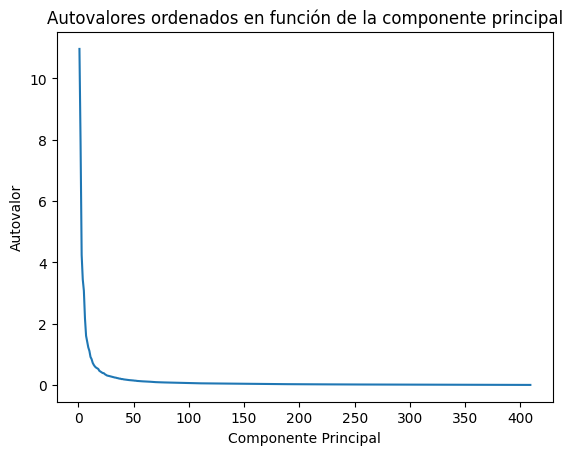

In [7]:
# Grafico los autovalores ordenados en función de las componentes principales
plt.plot(np.arange(1, len(l) + 1), l)
plt.xlabel('Componente Principal')
plt.ylabel('Autovalor')
plt.title('Autovalores ordenados en función de la componente principal')
plt.show()

### 2) c)

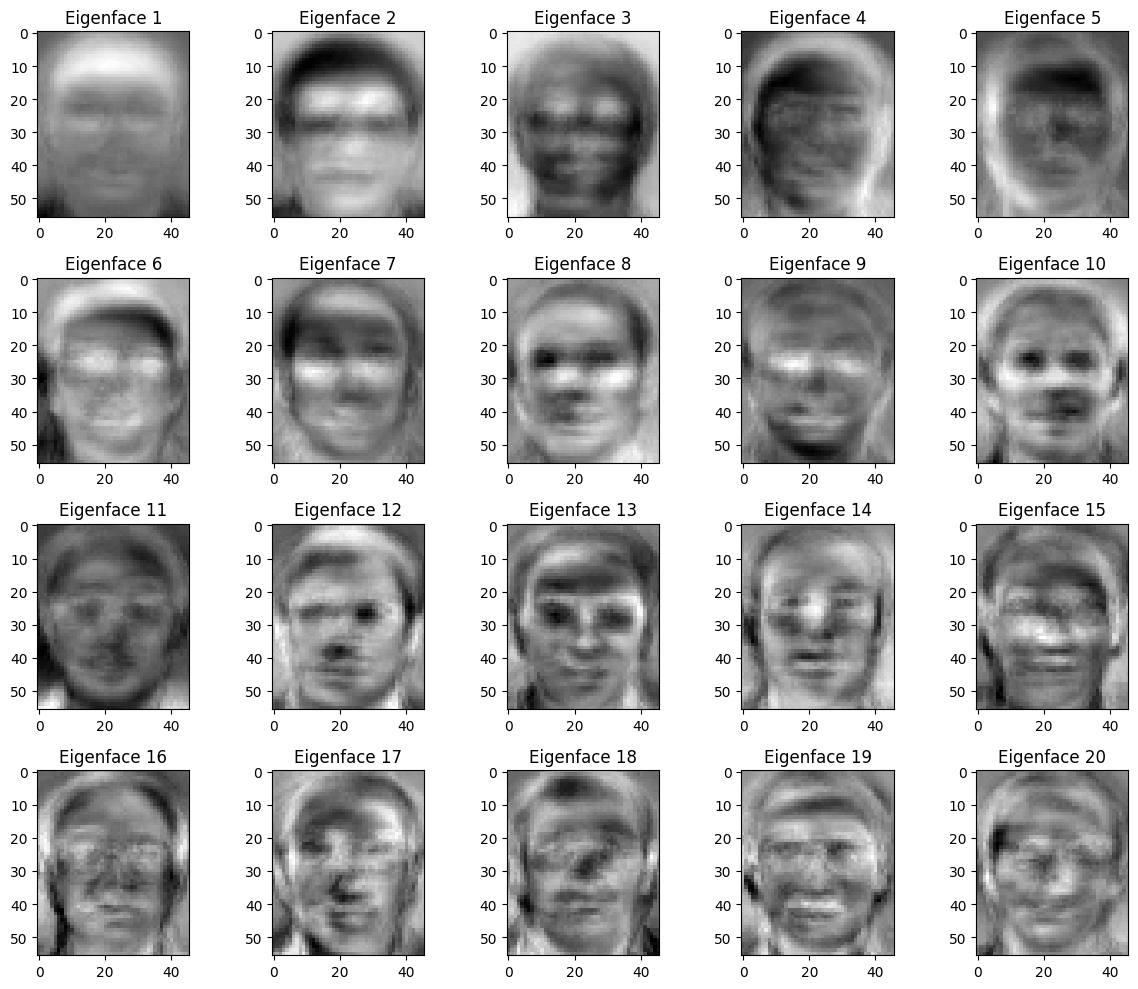

In [8]:
# Obtengo los primeros 20 autovectores correspondientes a los autovalores más grandes
num_eigenfaces = 20
eigenfaces = v[:, :num_eigenfaces]

# Normalizo las eigenfaces
eigenfaces /= np.linalg.norm(eigenfaces, axis=0)

fig, axes = plt.subplots(4, 5, figsize=(12, 10))
axes = axes.ravel()

for i in range(num_eigenfaces):
    eigenface = eigenfaces[:, i].reshape(56, 46)
    axes[i].imshow(eigenface, cmap='gray')
    axes[i].set_title(f'Eigenface {i+1}')

plt.tight_layout()
plt.show()

### 2) d) PCA

In [35]:
paths = []
imgs = []
for path in sorted(list(Path('caras').rglob('*/*.pgm'))):
    paths.append(path)
    imgs.append(plt.imread(path)[::2,::2]/255)
X = np.stack(imgs)


# # Imagen original
# plt.imshow(X[0], cmap='gray')


# Obtengo las primeras k componentes principales
k = 409  # Número deseado de componentes principales
componentes_principales = v[:, :k]

# Proyecto la imagen original en el espacio de menor dimension
z = componentes_principales.T @ X[0].flatten() # X_centered o X normal?

# # Reconstruyo la imagen a partir de las k componentes principales
imagen_reconstruida = componentes_principales @ z

# # Reshape de la imagen reconstruida a la forma original
imagen_reconstruida = z.reshape(X[0].shape)

plt.imshow(imagen_reconstruida, cmap='gray')
plt.show()

ValueError: cannot reshape array of size 409 into shape (56,46)

### 3a) PCA

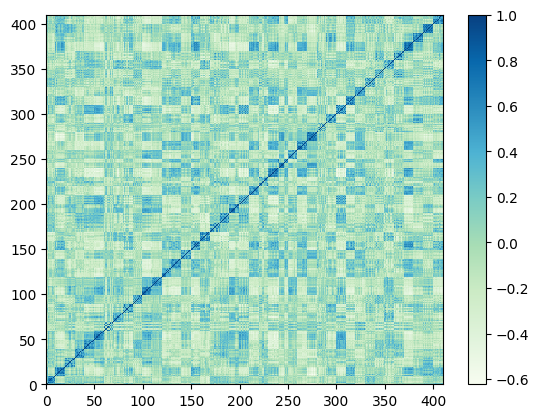

In [15]:
plt.pcolor(np.corrcoef(X_centered), cmap='GnBu')
plt.colorbar()


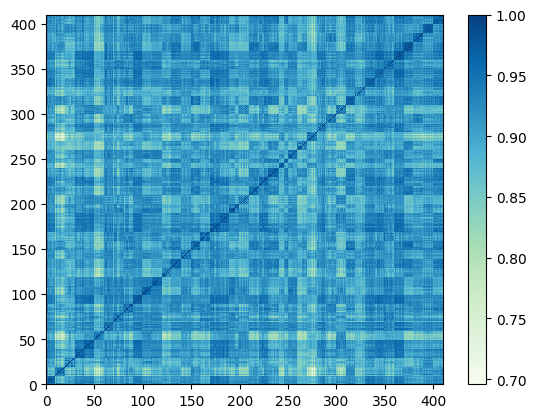

In [41]:
paths = []
imgs = []
for path in sorted(list(Path('caras').rglob('*/*.pgm'))):
    paths.append(path)
    imgs.append(plt.imread(path)[::2,::2]/255)
X = np.stack(imgs)


imgs_k = []

k = 409  # Número deseado de componentes principales
componentes_principales = v[:, :k]

# Proyecto la imagen original en el espacio de menor dimension
for i in range(X.shape[0]):
    z = componentes_principales.T @ X[i].flatten() # X_centered o X normal?
    imgs_k.append(z)
X_k = np.stack(imgs_k)

# # Reconstruyo la imagen a partir de las k componentes principales
# for z in X_k:
#     z = componentes_principales @ z
#     print(z.shape)

# # Reshape de la imagen reconstruida a la forma original
imagen_reconstruida = imagen_reconstruida.reshape(X[0].shape)


plt.pcolor(np.corrcoef(X_k), cmap='GnBu')
plt.colorbar()

### =======================================================================================

### 2DPCA

In [23]:
paths = []
imgs = []
for path in sorted(list(Path('caras').rglob('*/*.pgm'))):
    paths.append(path)
    imgs.append(plt.imread(path)[::,::]/255)
X = np.stack(imgs)

La variante 2DPCA 2 considera una imagen en su espacio original como una matriz A ∈ Ra×b
y le asocia un feature vector Y ∈ Ra, mediante la transformacion lineal Y = AX siendo
X ∈ Rb el vector que maximiza la dispersion de los features vectors obtenidos para todo el
conjunto de imagenes. Se puede ver que la eleccion  ́optima para el vector de proyeccion X
se corresponde con el autovector de maximo autovalor de la denominada image covariance
matrix

In [24]:
print(f"Tengo {X.shape[0]} imagenes de tamano {X.shape[1]}x{X.shape[2]}")
# A es la imagen
imgs = X

n = imgs.shape[0] # Cantidad de imagenes

A_prom = np.zeros(shape=(imgs.shape[1], imgs.shape[2]))

for i in range (n):
    A_prom += imgs[i]

A_prom /= n

# G = image covariance matrix (quiero calcularle autovalores y autovectores)
suma = 0
for j in range (n): 
    suma += ((np.transpose(imgs[j] - A_prom)) @ (imgs[j] - A_prom))
G = (1/n) * suma

# GUARDO TXT
#np.savetxt("../tests/2dpca_g.txt", G, delimiter=' ')

# # CORRO METODO
#run_test("2dpca_g.txt", 100000, 1e-21)

Tengo 410 imagenes de tamano 112x92


In [25]:
# Cargo autovalores y autovectores
l_G = np.loadtxt("../tests/2dpca_g.txt_autovalores.out", dtype='f', delimiter=' ')
v_G = np.loadtxt("../tests/2dpca_g.txt_autovectores.out", dtype='f', delimiter=' ', usecols=range(G.shape[0]))
v_G_transpose = v_G.T

# normalizo cada autovector
num_autovectores = v_G.shape[1]
for i in range(num_autovectores):
    norm = np.linalg.norm(v_G[:, i])
    v_G[:, i] /= norm

### 2) b) 2DPCA


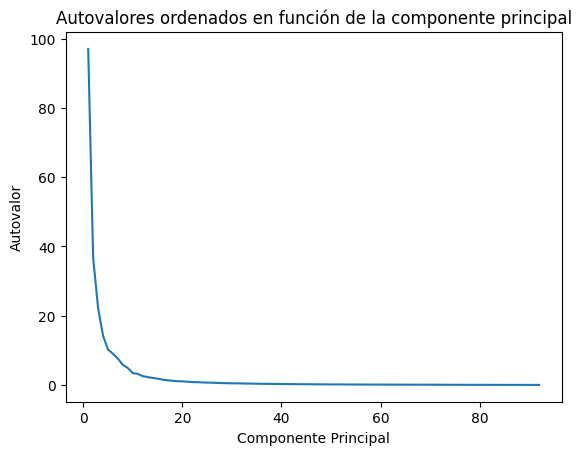

In [26]:
# Grafico los autovalores ordenados en función de las componentes principales
plt.plot(np.arange(1, len(l_G) + 1), l_G)
plt.xlabel('Componente Principal')
plt.ylabel('Autovalor')
plt.title('Autovalores ordenados en función de la componente principal')
plt.show()

### 2) c) 2DPCA

In [127]:
# EIGENFACES 2DPCA?

### 2) d) 2DPCA

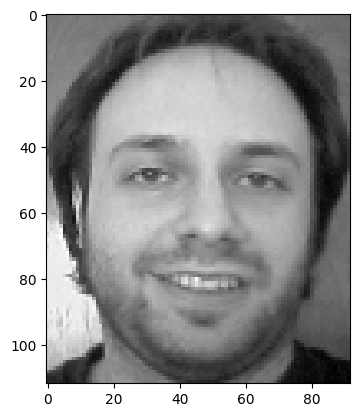

In [32]:
# feat_vecs de cada imagen
feature_vectors = imgs[0] @ v_G
# Son equivalentes estas dos
# A = imgs[x]
A = feature_vectors @ (v_G.T)

# Luego, el producto de arriba se puede descomponer como el producto externo
# Aca entran las k componentes.
k = 5

A_2 = np.zeros_like(A)
for j in range(k):
    A_2 += np.outer(feature_vectors[:,j], (v_G[:,j]).T)


plt.imshow(A_2, cmap='gray')
plt.show()

### 3a) PCA